In [128]:
%matplotlib inline

import time
import datetime as dt
import os
import glob
import json

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

os.getcwd()

'/home/edmz/Data Covid/Code'

https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-resultats-des-tests-virologiques-covid-19/

https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-personnes-vaccinees-contre-la-covid-19-1/

In [129]:
today = dt.date.today()
print(today)
date_choice = dt.date.today() - dt.timedelta(days = 1)
print(date_choice)

2021-04-05
2021-04-04


In [130]:
date = date_choice.strftime("%Y-%m-%d")
date_text = date_choice.strftime("%d/%m/%Y")
date_text

'04/04/2021'

### File paths

In [183]:
path_test = '../Data/sp-pos-quot-dep-{}-??h??.csv'.format(date)
path_test = glob.glob(path_test)
print('Données d\'entrée :') 
print(path_test)
fname_temp_test = './Temp' + path_test[0][7:-4]
print('Stockage fichiers intermédiaires :')
print(fname_temp_test)
fname_output_test = '../Output' + path_test[0][7:-4]
print('Stockage données de sortie :') 
print(fname_output_test)

Données d'entrée :
['../Data/sp-pos-quot-dep-2021-04-04-19h52.csv']
Stockage fichiers intermédiaires :
./Temp/sp-pos-quot-dep-2021-04-04-19h52
Stockage données de sortie :
../Output/sp-pos-quot-dep-2021-04-04-19h52


In [184]:
path_hosp = '../Data/donnees-hospitalieres-classe-age-covid19-{}-??h??.csv'.format(date)
path_hosp = glob.glob(path_hosp)
print('Données d\'entrée :') 
print(path_hosp)
fname_temp_hosp = './Temp' + path_hosp[0][7:-4]
print('Stockage fichiers intermédiaires :')
print(fname_hosp_temp)
fname_output_hosp = '../Output' + path_hosp[0][7:-4]
print('Stockage données de sortie :') 
print(fname_output_hosp)

Données d'entrée :
['../Data/donnees-hospitalieres-classe-age-covid19-2021-04-04-19h46.csv']
Stockage fichiers intermédiaires :
./Temp/donnees-hospitalieres-classe-age-covid19-2021-04-04-19h46
Stockage données de sortie :
../Output/donnees-hospitalieres-classe-age-covid19-2021-04-04-19h46


In [185]:
path_vac = '../Data/vacsi-a-dep-{}-??h??.csv'.format(date)
path_vac = glob.glob(path_vac)
print('Données d\'entrée :') 
print(path_vac)
fname_temp_vac = './Temp' + path_vac[0][7:-4]
print('Stockage fichiers intermédiaires :')
print(fname_temp_vac)
fname_output_vac = '../Output' + path_vac[0][7:-4]
print('Stockage données de sortie :') 
print(fname_output_vac)

Données d'entrée :
['../Data/vacsi-a-dep-2021-04-04-19h55.csv']
Stockage fichiers intermédiaires :
./Temp/vacsi-a-dep-2021-04-04-19h55
Stockage données de sortie :
../Output/vacsi-a-dep-2021-04-04-19h55


### Dictionnaries

In [134]:
fname = 'Json/reg_name.json'
with open(fname, 'r') as file:
    reg_name = json.loads(file.read())
print('Dict. reg_name')
print('     par exemple Région "11" :', reg_name['11'])

Dict. reg_name
     par exemple Région "11" : Île-de-France


In [135]:
fname = 'Json/reg2dep.json'
with open(fname, 'r') as file:
    reg2dep = json.loads(file.read())
print('Dict. reg2dep')
print('     par exemple Région "Corse" :', reg2dep['Corse'])

Dict. reg2dep
     par exemple Région "Corse" : ['2A', '2B']


In [136]:
fname = 'Json/dep-name.json'
with open(fname, 'r') as file:
    dep_name = json.loads(file.read())
dep_name['01']
print('Dict. dep_name')
print('     par exemple Département "67" :', dep_name['67'])

Dict. dep_name
     par exemple Département "67" : Bas-Rhin


In [137]:
fname = 'Json/dep2reg.json'
with open(fname, 'r') as file:
    dep2reg = json.loads(file.read())
print('Dict. dep2reg')
print('     par exemple Département "75" :', dep2reg['75'])

Dict. dep2reg
     par exemple Département "75" : Île-de-France


In [138]:
class_2_3C = {0: 'whole',
               9: '0-29',
               19: '0-29',
               29: '0-29',
               39: '30-59',
               49: '30-59',
               59: '30-59',
               69: '60+',
               79: '60+',
               89: '60+',
               90: '60+',
              }

In [139]:
fname = 'Json/reg_3C_pop.json'
with open(fname, 'r') as file:
    reg_3C_pop = json.loads(file.read())
print('Dict reg_3C_pop')
print('     par exemple Région "Grand Est" :', reg_3C_pop['Grand Est'])

Dict reg_3C_pop
     par exemple Région "Grand Est" : {'0-29': 1874571, '30-59': 2124342, '60+': 1512834, 'whole': 5511747}


In [140]:
reg_2lignes = {'Auvergne-Rhône-Alpes': 'Auvergne-\nRhône-Alpes',
 'Bourgogne-Franche-Comté': 'Bourgogne-\nFranche-Comté',
 'Bretagne': 'Bretagne',
 'Centre-Val de Loire': 'Centre-\nVal de Loire',
 'Corse': 'Corse',
 'Grand Est': 'Grand Est',
 'Hauts-de-France': 'Hauts-de-France',
 'Normandie': 'Normandie',
 'Nouvelle-Aquitaine': 'Nouvelle-\nAquitaine',
 'Occitanie': 'Occitanie',
 'Outre-mer': 'Outre-mer',
 'Pays de la Loire': 'Pays\nde la Loire',
 "Provence-Alpes-Côte d'Azur": "Provence-\nAlpes-Côte d'Azur",
 'Île-de-France': 'Île-de-France'}

### Functions

In [141]:
def groupby_sum(d, columns):
    """d: dataframe
    columns: list of column names
    returns: dataframe processed"""
    dg = (d
          .groupby(columns)
          .agg([sum])
          .reset_index()
         )
    dg.columns = dg.columns.droplevel(level = 1)
    dg = dg.reindex(columns = d.columns) # keep same column order
                                    
    return dg

In [142]:
def columns_first(d, columns):
    """d: dataframe
    by: a list of column names
    returns: dataframe reordered"""
    d = d.reindex(columns = columns + [column for column in d.columns if column not in columns])
    return d

# Traitement des données SIDEP (coronavirus-positive cases # and tests #)

In [186]:
fname = path_test[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,dep,jour,P,T,cl_age90,pop
321874,90,2020-08-22,0,28,39,16796.0
217761,61,2020-06-14,0,2,59,38069.0
226979,63,2020-12-21,25,1267,59,86381.0


In [187]:
d = din.copy()
d = d.rename(columns = {'dep': 'entity'})
d = columns_first(d, columns = ['entity', 'cl_age90', 'jour'])
d_dep = d
d_dep.sample(3)

,entity,cl_age90,jour,P,T,pop
49460,14,49,2021-02-21,4,84,84964.0
157746,44,69,2020-08-05,2,157,158571.0
323436,90,39,2021-01-11,13,130,16796.0


In [188]:
d = din.copy()
d['reg'] = d['dep'].map(lambda x: dep2reg[x])
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['reg', 'jour', 'cl_age90'])
dg = d.rename(columns = {'reg': 'entity'})
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_reg = dg
d_reg.sample(3)

,entity,cl_age90,jour,P,T,pop
34958,Grand Est,9,2021-01-30,2,33,35109.000000
341887,Île-de-France,79,2021-03-09,32,366,72032.000000
367666,Outre-mer,29,2020-07-04,0,0,3799.054642


In [189]:
d = din.copy()
d = d.drop(columns = ['dep'])
dg = groupby_sum(d, columns = ['jour', 'cl_age90'])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'cl_age90', 'jour'])
d_nat = dg
d_nat.sample(3)

,entity,cl_age90,jour,P,T,pop
1343,France entière,9,2020-09-12,174,9243,7.763206e+06
2046,France entière,0,2020-11-15,2703,26288,6.711500e+07
1076,France entière,89,2020-08-18,72,6628,3.245281e+06


In [190]:
d = pd.merge(d_dep, d_reg, how = 'outer')
dout = pd.merge(d, d_nat, how = 'outer')
dout.head(3)

,entity,cl_age90,jour,P,T,pop
0,01,9,2020-05-13,0,16,83001.0
1,01,19,2020-05-13,1,17,84665.0
2,01,29,2020-05-13,0,34,65496.0


In [191]:
dout.tail(3)

,entity,cl_age90,jour,P,T,pop
744873,France entière,79,2021-04-01,1916,25275,5.695639e+06
744874,France entière,89,2021-04-01,996,15633,3.245281e+06
744875,France entière,90,2021-04-01,447,9159,9.125806e+05


In [192]:
fname = fname_temp_test + '-tot.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - 3 classes d'âge

In [193]:
fname = fname_temp_test + '-tot.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.tail(3)

,entity,cl_age90,jour,P,T,pop
744873,France entière,79,2021-04-01,1916,25275,5.695639e+06
744874,France entière,89,2021-04-01,996,15633,3.245281e+06
744875,France entière,90,2021-04-01,447,9159,9.125806e+05


In [194]:
d = din.copy()
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class'])
dout = dg
dout.tail(10)

,entity,jour,P,T,pop,three_class
154214,Île-de-France,2021-03-30,1828,19249,2517033.0,60+
154215,Île-de-France,2021-03-30,15232,152044,12278210.0,whole
154216,Île-de-France,2021-03-31,5583,61610,4792882.0,0-29
154217,Île-de-France,2021-03-31,6326,56947,4968295.0,30-59
154218,Île-de-France,2021-03-31,1552,15489,2517033.0,60+
154219,Île-de-France,2021-03-31,13469,134083,12278210.0,whole
154220,Île-de-France,2021-04-01,4885,65487,4792882.0,0-29
154221,Île-de-France,2021-04-01,6136,61127,4968295.0,30-59
154222,Île-de-France,2021-04-01,1533,15292,2517033.0,60+
154223,Île-de-France,2021-04-01,12559,141960,12278210.0,whole


In [195]:
fname = fname_temp_test + '-tot-3C.csv'
dout.to_csv(fname, sep = ';', index = False)

### SIDEP - calculs chiffres hebdomadaires

In [196]:
fname = fname_temp_test + '-tot-3C.csv'
din = pd.read_csv(fname, 
                sep = ';', 
                parse_dates = ['jour'], 
                dtype = {'entity': str},
                skiprows = [])
din.sample(3)

,entity,jour,P,T,pop,three_class
148670,Occitanie,2020-12-30,453,9206,1747566.0,60+
104705,80,2021-01-24,19,157,212205.0,30-59
8057,07,2020-07-22,0,132,122997.0,30-59


In [26]:
d = din
entities = d['entity'].unique()
three_classes = d['three_class'].unique()
tic1 = time.time()
d['P hebdo'] = np.zeros(len(d))
d['T hebdo'] = np.zeros(len(d))
for entity in entities:
    for age_class in three_classes:
        d2 = d[(d['entity'] == entity) & (d['three_class'] == age_class)]
        d['temp'] = d2.apply(lambda x : (d2[ (d2['jour'] <= x['jour']) 
                                                        & (d2['jour'] > x['jour'] - np.timedelta64(1,'W'))]
                                                    ['P']
                                                    .sum()), axis = 1)
        d['P hebdo'] = d['P hebdo'] + d['temp'].fillna(0)
        d['temp'] = d2.apply(lambda x : (d2[ (d2['jour'] <= x['jour']) 
                                                        & (d2['jour'] > x['jour'] - np.timedelta64(1,'W'))]
                                                    ['T']
                                                    .sum()), axis = 1)
        d['T hebdo'] = d['T hebdo'] + d['temp'].fillna(0)
    toc1 = time.time()
    print('{:.2f} s : entité {}'.format(-tic1+toc1, entity))

1.58 s : entité 01
3.13 s : entité 02
4.70 s : entité 03
6.26 s : entité 04
7.83 s : entité 05
9.39 s : entité 06
10.95 s : entité 07
12.51 s : entité 08
14.07 s : entité 09
15.64 s : entité 10
17.21 s : entité 11
18.77 s : entité 12
20.34 s : entité 13
21.91 s : entité 14
23.47 s : entité 15
25.04 s : entité 16
26.62 s : entité 17
28.20 s : entité 18
29.77 s : entité 19
31.35 s : entité 21
32.92 s : entité 22
34.49 s : entité 23
36.06 s : entité 24
37.64 s : entité 25
39.21 s : entité 26
40.77 s : entité 27
42.35 s : entité 28
43.92 s : entité 29
45.50 s : entité 2A
47.06 s : entité 2B
48.62 s : entité 30
50.18 s : entité 31
51.75 s : entité 32
53.33 s : entité 33
54.91 s : entité 34
56.47 s : entité 35
58.04 s : entité 36
59.60 s : entité 37
61.18 s : entité 38
62.74 s : entité 39
64.30 s : entité 40
65.86 s : entité 41
67.42 s : entité 42
69.00 s : entité 43
70.58 s : entité 44
72.15 s : entité 45
73.72 s : entité 46
75.29 s : entité 47
76.85 s : entité 48
78.42 s : entité 49
79.98 

In [27]:
d.tail()

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,temp
153743,Île-de-France,whole,2021-03-30,14798,149681,12278210.0,83448.0,814807.0,814807.0
153744,Île-de-France,0-29,2021-03-31,5375,60421,4792882.0,33596.0,372013.0,NaN
153745,Île-de-France,30-59,2021-03-31,6109,55886,4968295.0,38804.0,344947.0,NaN
153746,Île-de-France,60+,2021-03-31,1488,15154,2517033.0,10461.0,107280.0,NaN
153747,Île-de-France,whole,2021-03-31,12979,131497,12278210.0,82895.0,824595.0,824595.0


In [28]:
d['incidence hebdo'] = d['P hebdo'] / d['pop'] * 100000
d['positivite hebdo'] = d['P hebdo'] / d['T hebdo'] * 100
d['taux de test hebdo'] = d['T hebdo'] / d['pop'] * 100000
d = d.drop(columns = ['temp'])
d.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
16232,13,0-29,2020-11-11,49,573,710300.0,1853.0,18541.0,260.875686,9.994067,2610.305505
132956,977,0-29,2021-03-02,2,37,3474.0,18.0,472.0,518.134715,3.813559,13586.643638
17762,14,60+,2021-01-09,22,654,201453.0,282.0,6376.0,139.983023,4.422836,3165.006230


In [29]:
d.tail(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
153745,Île-de-France,30-59,2021-03-31,6109,55886,4968295.0,38804.0,344947.0,781.032527,11.249264,6942.965343
153746,Île-de-France,60+,2021-03-31,1488,15154,2517033.0,10461.0,107280.0,415.608377,9.751119,4262.161044
153747,Île-de-France,whole,2021-03-31,12979,131497,12278210.0,82895.0,824595.0,675.139129,10.052814,6715.921946


In [30]:
fname = fname_temp + '-tot-3C-processed.csv'
d.to_csv(fname, sep = ';', index = False)

# Traitement des données hospitalières

In [31]:
fname = path2[0]
din = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'dep': str})
din.sample(3)

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
50083,94,0,2020-11-25,48,8,NaN,NaN,NaN,461,109
33385,52,0,2020-09-02,78,12,NaN,NaN,NaN,2438,493
20242,6,19,2020-06-28,1,0,NaN,NaN,NaN,20,0


In [32]:
d = din.copy()
d['entity'] = (d['reg']
               .map(lambda x: reg_name[str(x)] )
               .replace({
                   'Guadeloupe':'Outre-mer',
                   'Martinique':'Outre-mer',
                   'Guyane':'Outre-mer',
                   'La Réunion':'Outre-mer',
                   'Mayotte':'Outre-mer',
               })
              )
d = columns_first(d, columns = ['entity'])
d = d.drop(columns = ['reg'])
d.head(3)

,entity,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,Outre-mer,0,2020-03-18,0,0,NaN,NaN,NaN,0,0
1,Outre-mer,9,2020-03-18,0,0,NaN,NaN,NaN,0,0
2,Outre-mer,19,2020-03-18,0,0,NaN,NaN,NaN,0,0


In [33]:
d['three_class'] = d['cl_age90'].map(lambda x: class_2_3C[x])
d = d.drop(columns = 'cl_age90')
dg = groupby_sum(d,['entity', 'jour', 'three_class',])
# dg = (dg.reset_index()
#       .drop(columns = ['cl_age90'])
#             )
dg = columns_first(dg, ['entity', 'three_class', 'jour',])
d_reg = dg.copy()
d_reg.tail(3)

,entity,three_class,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
21389,Île-de-France,30-59,2021-04-03,1793,563,1037.0,149.0,44.0,23987,1270
21390,Île-de-France,60+,2021-04-03,5433,1033,2752.0,1611.0,37.0,47748,15568
21391,Île-de-France,whole,2021-04-03,7469,1631,3968.0,1777.0,93.0,76898,16981


In [34]:
d = d_reg.copy()
dg = groupby_sum(d, columns = ['jour', 'three_class',])
dg['entity'] = 'France entière'
dg = columns_first(dg, columns = ['entity', 'three_class', 'jour',])
d_nat = dg
d_nat.sample(3)

,entity,three_class,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
826,France entière,60+,2020-10-10,6369,1110,0.0,0.0,0.0,64585,20294
653,France entière,30-59,2020-08-28,839,102,0.0,0.0,0.0,25317,1299
203,France entière,whole,2020-05-07,23139,2911,0.0,0.0,0.0,55018,16367


In [35]:
d_tot = pd.merge(d_reg, d_nat, how = 'outer')
i = int(len(d_tot)*14/15)
d_tot.iloc[i-2:i+2]
d_tot = d_tot.drop(columns = ['HospConv', 'SSR_USLD', 'autres', 'rad'])
d_tot.sample(3)

,entity,three_class,jour,hosp,rea,dc
4886,Centre-Val de Loire,60+,2020-06-01,551,28,488
2994,Bourgogne-Franche-Comté,60+,2021-03-19,968,120,3837
7497,Corse,30-59,2021-02-27,5,0,9


In [36]:
d = d_tot
entities = d['entity'].unique()
three_classes = d['three_class'].unique()
d['dc hebdo'] = np.zeros(len(d))
for entity in entities:
    for age_class in three_classes:
        d2 = d[(d['entity'] == entity) & (d['three_class'] == age_class)]
        d.loc[ d.jour >= '2020-03-25', 'temp' ] = d2.jour[ d2.jour >= '2020-03-25'].map(lambda x : d2[d2.jour == x].dc.values[0] 
                                                    - d2[d2.jour == x - np.timedelta64(1,'W')].dc.values[0])
        d['dc hebdo'] = d['dc hebdo'] + d['temp'].fillna(0)
d = d.drop(columns = ['temp', 'dc'])
d.sample(3)

,entity,three_class,jour,hosp,rea,dc hebdo
11374,Normandie,60+,2020-09-03,52,1,2.0
10014,Hauts-de-France,60+,2020-10-15,877,122,58.0
11691,Normandie,whole,2020-11-21,1336,152,126.0


In [37]:
d['taux hosp'] = d.apply(lambda x: x['hosp'] / reg_3C_pop 
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                         axis = "columns")
d['taux rea'] = d.apply(lambda x: x['rea'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d['taux décès'] = d.apply(lambda x: x['dc hebdo'] / reg_3C_pop
                                                    [ x['entity'] ]
                                                    [ x['three_class'] ] * 100000, 
                        axis = "columns")
d

,entity,three_class,jour,hosp,rea,dc hebdo,taux hosp,taux rea,taux décès
0,Auvergne-Rhône-Alpes,0-29,2020-03-18,4,0,0.0,0.141085,0.000000,0.000000
1,Auvergne-Rhône-Alpes,30-59,2020-03-18,33,11,0.0,1.069485,0.356495,0.000000
2,Auvergne-Rhône-Alpes,60+,2020-03-18,127,24,0.0,6.014371,1.136574,0.000000
3,Auvergne-Rhône-Alpes,whole,2020-03-18,172,35,0.0,2.141334,0.435737,0.000000
4,Auvergne-Rhône-Alpes,0-29,2020-03-19,5,1,0.0,0.176356,0.035271,0.000000
...,...,...,...,...,...,...,...,...,...
22915,France entière,whole,2021-04-02,28729,5254,1928.0,42.805635,7.828355,2.872681
22916,France entière,0-29,2021-04-03,454,53,3.0,1.925648,0.224800,0.012725
22917,France entière,30-59,2021-04-03,5385,1479,87.0,20.968865,5.759137,0.338773
22918,France entière,60+,2021-04-03,22787,3692,1816.0,127.604055,20.674690,10.169349


In [38]:
dout = d
fname = fname_temp2 + '-processed.csv'
dout.to_csv(fname, sep = ';', index = False)

# Fusion SIDEP et données hospitalières

In [39]:
fname = fname_temp + '-tot-3C-processed.csv'
d = pd.read_csv(fname, sep = ';', 
                parse_dates = ['jour'],
                dtype = {'entity': str},
               )
d.sample(3)

,entity,three_class,jour,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
107101,82,30-59,2021-02-26,26,662,100406.0,154.0,3222.0,153.377288,4.779640,3208.971575
18448,15,0-29,2020-08-11,1,65,37394.0,3.0,268.0,8.022677,1.119403,716.692518
128192,974,0-29,2020-07-23,9,521,354358.0,19.0,2977.0,5.361809,0.638226,840.110848


In [40]:
len(d)

153748

In [41]:
fname = fname_temp2 + '-processed.csv'
d2 = pd.read_csv(fname, sep = ';', parse_dates = ['jour'])
d2.sample(3)

,entity,three_class,jour,hosp,rea,dc hebdo,taux hosp,taux rea,taux décès
13161,Nouvelle-Aquitaine,30-59,2020-11-07,191,38,2.0,8.523521,1.695779,0.089252
17959,Pays de la Loire,whole,2020-12-30,912,69,92.0,23.988656,1.814931,2.419908
9977,Hauts-de-France,30-59,2020-10-06,91,27,0.0,3.999742,1.186737,0.000000


In [42]:
len(d2)

22920

In [43]:
d = pd.merge(d2, d, how = 'outer')
d.sample(10)

,entity,three_class,jour,hosp,rea,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
72891,38,whole,2020-12-17,NaN,NaN,NaN,NaN,NaN,NaN,506.0,11547.0,1.264979e+06,2810.0,41813.0,222.138075,6.720398,3305.430367
117028,72,0-29,2021-02-08,NaN,NaN,NaN,NaN,NaN,NaN,62.0,839.0,1.908890e+05,272.0,4832.0,142.491186,5.629139,2531.314010
40855,14,whole,2021-02-21,NaN,NaN,NaN,NaN,NaN,NaN,11.0,586.0,6.914530e+05,882.0,20407.0,127.557477,4.322046,2951.321348
105072,63,0-29,2020-11-18,NaN,NaN,NaN,NaN,NaN,NaN,49.0,594.0,2.227720e+05,425.0,5178.0,190.778015,8.207802,2324.349559
54602,26,60+,2020-10-28,NaN,NaN,NaN,NaN,NaN,NaN,234.0,810.0,1.506940e+05,954.0,4099.0,633.070992,23.273969,2720.081755
44413,17,30-59,2020-12-04,NaN,NaN,NaN,NaN,NaN,NaN,6.0,783.0,2.309450e+05,56.0,3870.0,24.248198,1.447028,1675.723657
1626,Bourgogne-Franche-Comté,60+,2020-04-11,1083.0,214.0,152.0,127.569801,25.207698,17.904533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58052,29,0-29,2020-07-14,NaN,NaN,NaN,NaN,NaN,NaN,0.0,70.0,2.913610e+05,28.0,1054.0,9.610071,2.656546,361.750543
17445,Pays de la Loire,30-59,2020-08-24,19.0,5.0,0.0,1.331841,0.350484,0.000000,74.0,4044.0,1.426597e+06,440.0,18046.0,30.842628,2.438213,1264.968313
16400,Outre-mer,0-29,2020-12-23,16.0,0.0,0.0,1.672115,0.000000,0.000000,49.0,1468.0,9.568720e+05,359.0,9477.0,37.518078,3.788119,990.414565


In [44]:
len(d)

157288

In [45]:
d.tail()

,entity,three_class,jour,hosp,rea,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
157283,978,whole,2021-03-30,NaN,NaN,NaN,NaN,NaN,NaN,2.0,146.0,35334.000000,30.0,1030.0,84.904058,2.912621,2915.039339
157284,978,0-29,2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,42.0,15451.470743,9.0,246.0,58.246882,3.658537,1592.081454
157285,978,30-59,2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,100.0,15252.902558,11.0,610.0,72.117421,1.803279,3999.238818
157286,978,60+,2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.0,4629.626699,2.0,173.0,43.200027,1.156069,3736.802366
157287,978,whole,2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,166.0,35334.000000,22.0,1029.0,62.262976,2.137998,2912.209204


In [46]:
dout = d
fname = fname_temp + '-synthese.csv'
dout.to_csv(fname, sep = ';', index = False)

# Graphes

In [47]:
fname = fname_temp + '-synthese.csv'
d = pd.read_csv(fname, sep = ';', parse_dates = ['jour'], dtype = {'entity': str})
d.sample(3)

,entity,three_class,jour,hosp,rea,dc hebdo,taux hosp,taux rea,taux décès,P,T,pop,P hebdo,T hebdo,incidence hebdo,positivite hebdo,taux de test hebdo
62453,30,30-59,2020-11-22,NaN,NaN,NaN,NaN,NaN,NaN,12.0,120.0,279798.0,523.0,7287.0,186.920564,7.177165,2604.378873
69789,36,30-59,2020-08-10,NaN,NaN,NaN,NaN,NaN,NaN,0.0,61.0,76938.0,2.0,275.0,2.599496,0.727273,357.430658
12006,Normandie,60+,2021-02-08,1208.0,101.0,112.0,126.869967,10.607505,11.762778,243.0,5252.0,952156.0,1442.0,26203.0,151.445771,5.503187,2751.965014


In [48]:
entities = d['entity'].unique()
three_class = d['three_class'].unique()

In [49]:
entities

array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Corse', 'Grand Est', 'Hauts-de-France',
       'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Outre-mer',
       'Pays de la Loire', "Provence-Alpes-Côte d'Azur", 'Île-de-France',
       'France entière', '01', '02', '03', '04', '05', '06', '07', '08',
       '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40',
       '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
       '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95',
       '971', '972', '973', '974', '975', '976', '977', '978

In [50]:
regions = entities[:14]
regions

array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Corse', 'Grand Est', 'Hauts-de-France',
       'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Outre-mer',
       'Pays de la Loire', "Provence-Alpes-Côte d'Azur", 'Île-de-France'],
      dtype=object)

In [51]:
three_class

array(['0-29', '30-59', '60+', 'whole'], dtype=object)

In [52]:
last_week = d.jour >= np.datetime64(dt.datetime.fromisoformat(date) - dt.timedelta(weeks = 1))
last_week

0         False
1         False
2         False
3         False
4         False
          ...  
157283     True
157284     True
157285     True
157286     True
157287     True
Name: jour, Length: 157288, dtype: bool

In [53]:
regions_ordered = (d[(last_week) 
                    & (d.entity.isin(regions))
                    & (d.three_class == '60+')]
                   .groupby('entity')['taux hosp']
                   .mean()
                   .sort_values(ascending = False)
                   .index
                   .tolist())
regions_ordered

['Île-de-France',
 'Hauts-de-France',
 "Provence-Alpes-Côte d'Azur",
 'Grand Est',
 'Auvergne-Rhône-Alpes',
 'Normandie',
 'Bourgogne-Franche-Comté',
 'Centre-Val de Loire',
 'Corse',
 'Occitanie',
 'Pays de la Loire',
 'Bretagne',
 'Nouvelle-Aquitaine',
 'Outre-mer']

In [54]:
def format_graph(ax, index, ymin, ymax, title, date):
    
    ax.patch.set_alpha(0)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_ylim(ymin, ymax)
    ax.grid(axis = 'y')
    ax.tick_params(axis='y', left = False, labelsize = 10)
    
    ax.set_xlim(dt.datetime(2020, 3, 1), 
                dt.datetime(2021, 6, 1))
    
    
    ax.axvline(dt.datetime(2021, 1, 1), 
               ymin = 0, ymax = .85, 
               c = 'black', 
               linewidth = 0.5,
               linestyle = '--')
    
    ax.axvspan(dt.datetime(2020, 3, 17), 
               dt.datetime(2020, 5, 10),
               ymin = 0, ymax = .85,
               alpha=0.15, color='gray')
    
    ax.axvspan(dt.datetime(2020, 10, 30), 
               dt.datetime(2020, 12, 15),
               ymin = 0, ymax = .85,
               alpha=0.15, color='gray')
    
    ax.axvspan(dt.datetime(2021, 4, 5), 
               dt.datetime(2021, 5, 2),
               ymin = 0, ymax = .85,
               alpha=0.15, color='gray')
    
    if index == 0:
        (ax.legend(bbox_to_anchor=[1.55, .45], 
              loc='center',
              labelspacing=0.5,       
              handlelength=2, 
              handletextpad=0.5,
              frameon=True,
              fontsize = 14,
              title = title.format(date),
              title_fontsize = 14,
              )
        )
        plt.setp(ax.get_legend().get_title(), multialignment='center')
        
        ax.tick_params(axis='x', bottom = True,
                   labelsize = 9)
        locs = []
        for i in range(16):
            locs.append(dt.datetime(2020, 3 + i , 1) if i <= 9 
                        else dt.datetime(2021, i - 9, 1))
        labels = ['mars','avril', 'mai', 'juin', 'juil.', 
                 'août', 'sept.', 'oct.', 'nov.', 'déc.', 
                 'janv.', 'fév.', 'mars', 'avril', 
                  'mai', 'juin']
        ax.set_xticks(locs)
        ax.set_xticklabels(labels)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    else:
        ax.tick_params(axis='x', bottom = False)
        ax.set_xticklabels([])
        
    if index % 4 != 0:
        ax.set_yticklabels([])
        

In [55]:
def produce_fig(ymin, ymax, d, column_to_plot, main_color, title, fname):


    fig, axs = plt.subplots(4, 4, figsize = (16,12))
    axs = axs.ravel()


    ax = axs[0]
    
    dplot = d.loc[d.entity == "France entière"].loc[d.three_class == '60+']
    ax.plot(dplot.jour, dplot[column_to_plot], c = main_color, linewidth = 4, label = '60+')

    dplot = d.loc[d.entity == "France entière"].loc[d.three_class == '30-59']
    ax.plot(dplot.jour, dplot[column_to_plot], c = "black", linewidth = 2, label = '30-59')

    dplot = d.loc[d.entity == "France entière"].loc[d.three_class == '0-30']
    ax.plot(dplot.jour, dplot[column_to_plot], c = "firebrick", linewidth = 1, label = '0-30')


    format_graph(ax, 0, ymin, ymax, title, date)
    ax.set_title('France entière', x = 0.02, y = .85, loc = 'left', 
                 fontsize = 18, c = 'royalblue', fontweight='semibold')

    ax = axs[1]
    ax.set_axis_off() 


    for i, reg in enumerate(regions_ordered):

        ax = axs[i+2]

        dplot = d.loc[d.entity == reg].loc[d.three_class == '60+']
        ax.plot(dplot.jour, dplot[column_to_plot], c = main_color, linewidth = 4)

        dplot = d.loc[d.entity == reg].loc[d.three_class == '30-59']
        ax.plot(dplot.jour, dplot[column_to_plot], linewidth = 2, c = "black")

        dplot = d.loc[d.entity == reg].loc[d.three_class == '0-30']
        ax.plot(dplot.jour, dplot[column_to_plot], c = "firebrick", linewidth = 1)


        format_graph(ax, i+2, ymin, ymax, title, date)

        ax.set_title(reg, x = 0.02, y = -0.15, loc = 'left', 
                     fontsize = 14, c = 'royalblue', fontweight='normal', family = 'sans')


    fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.05, 
                        hspace=0.2)

    fname = fname
    fig.savefig(fname, pad_inches = 0)

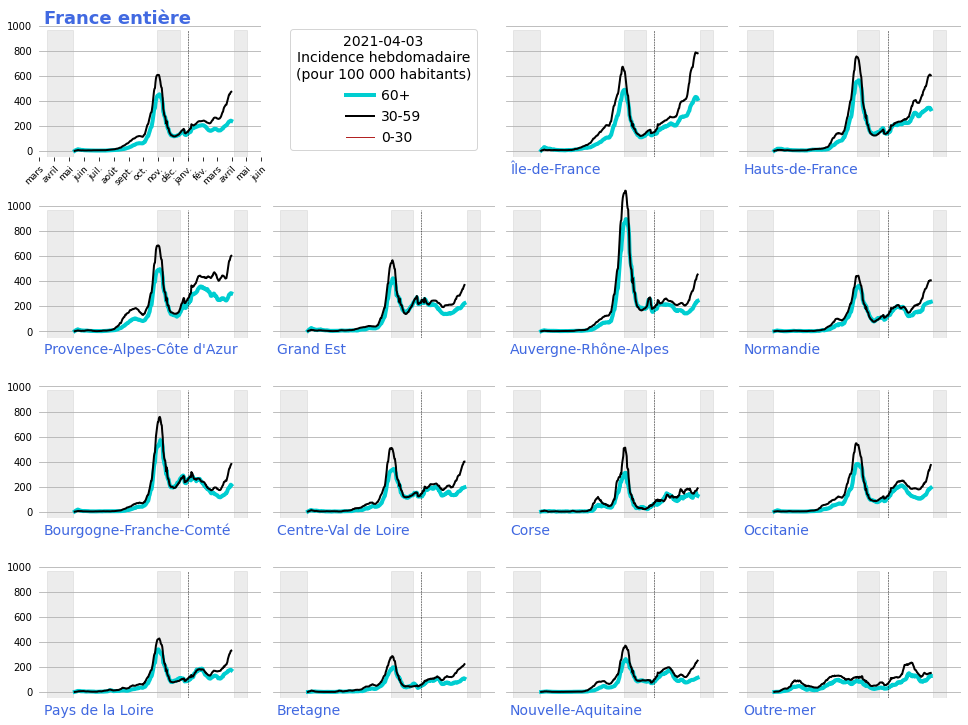

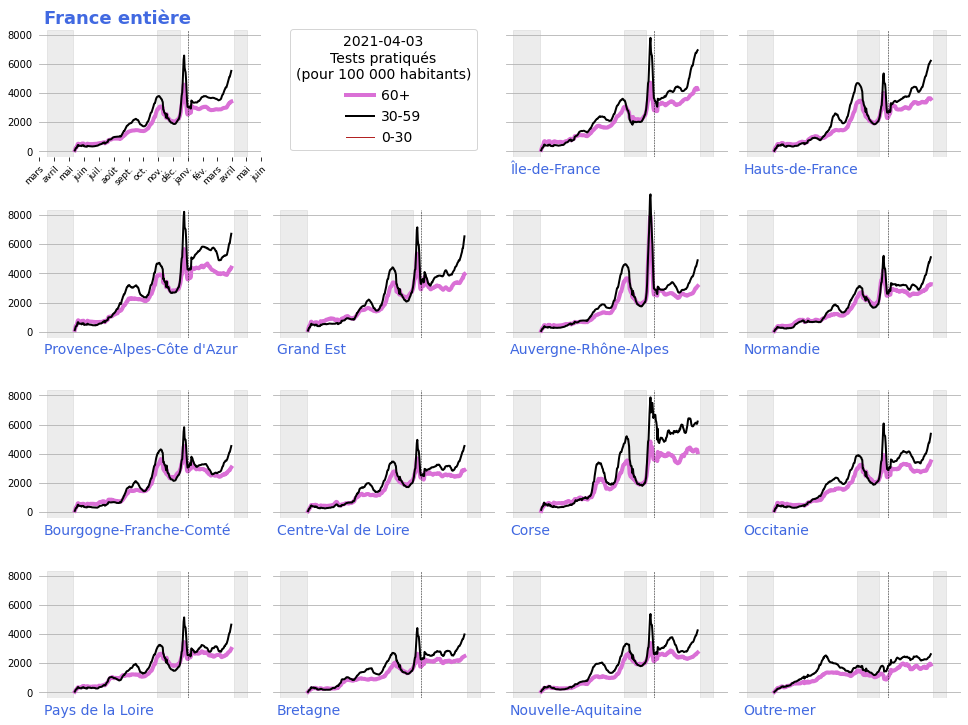

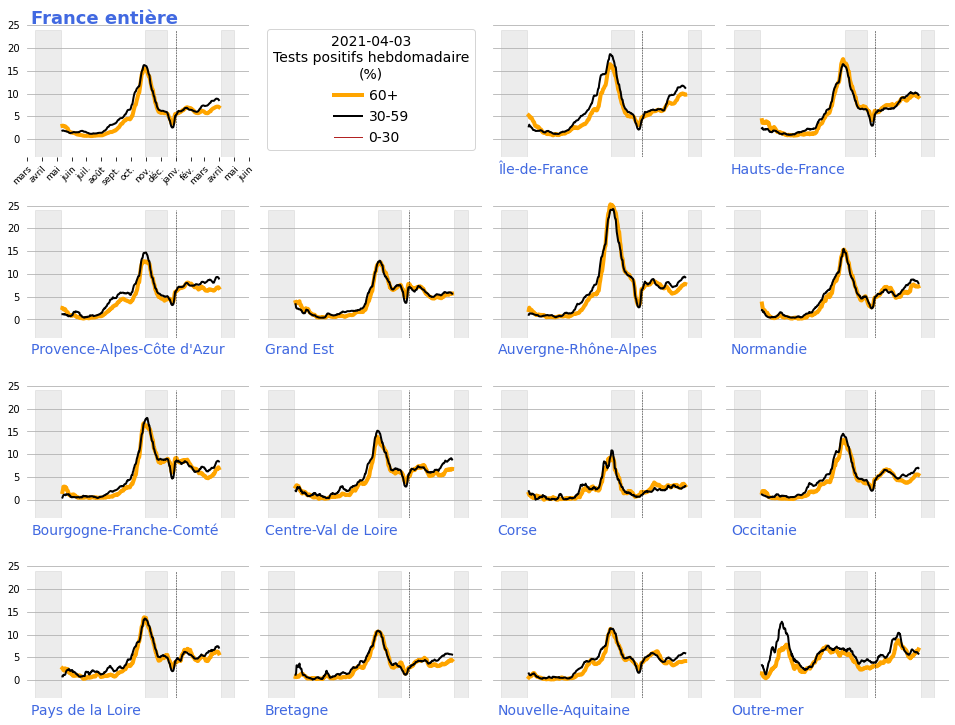

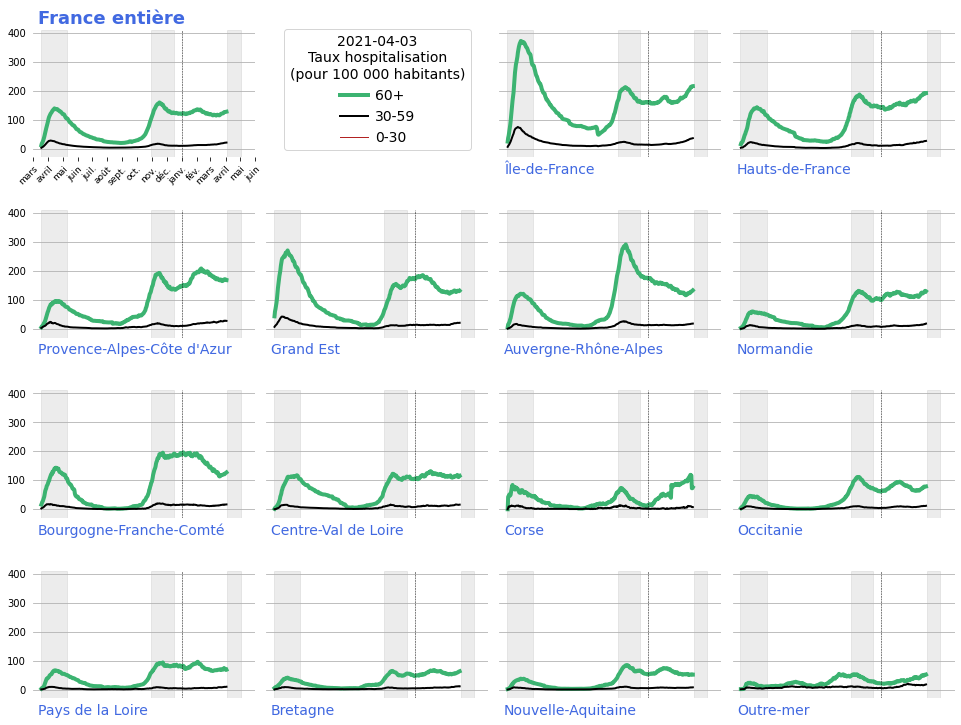

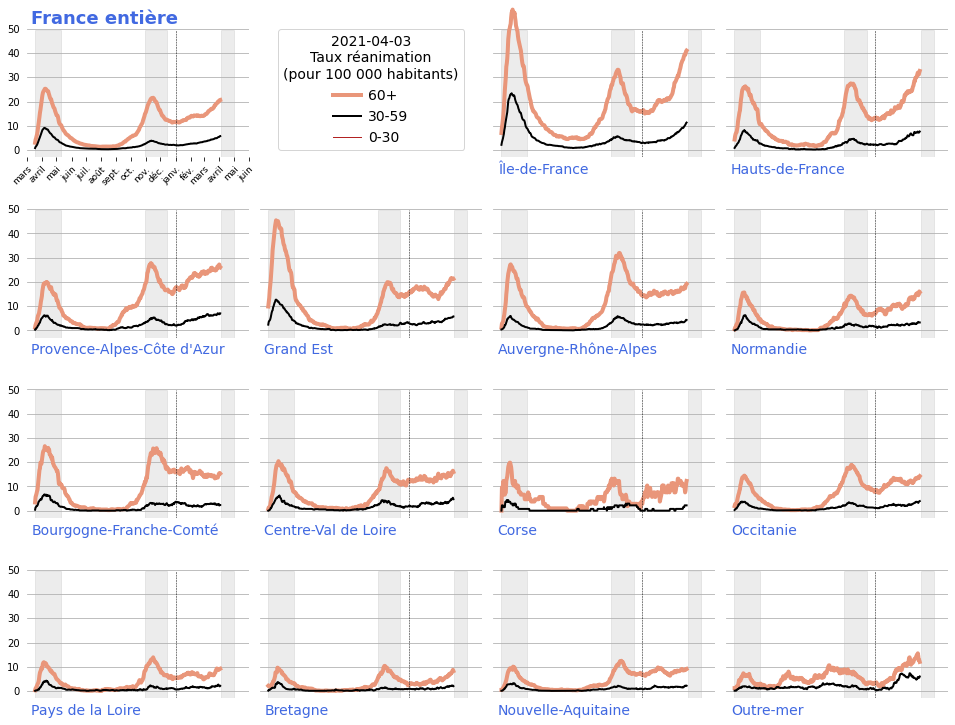

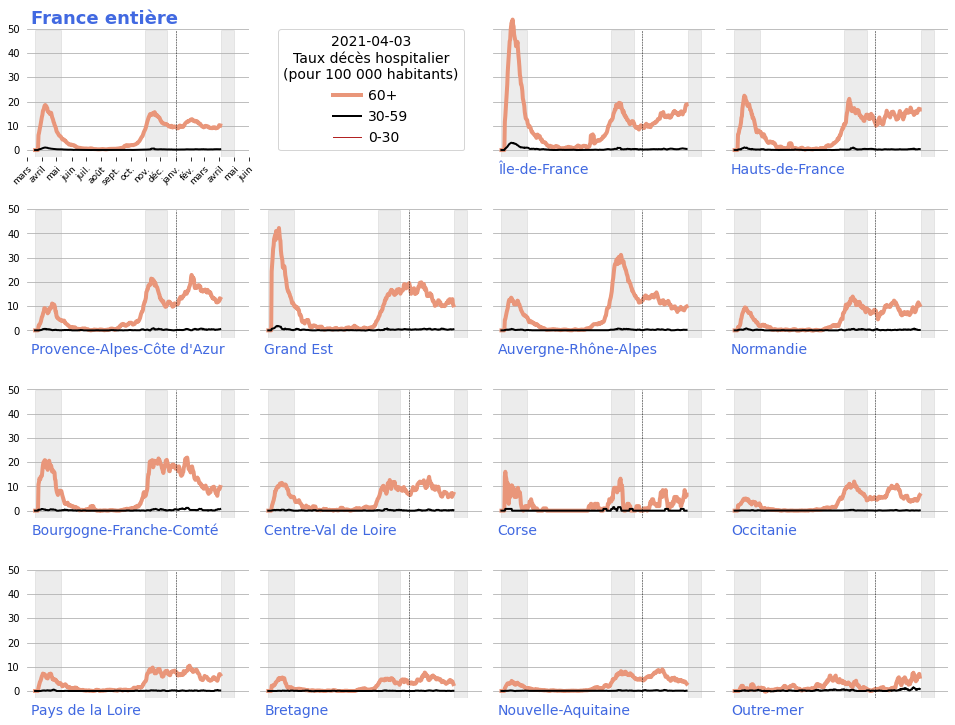

In [56]:
produce_fig(ymin = -50,
    ymax = 1150,
            d = d,
    column_to_plot = "incidence hebdo",
    main_color = "darkturquoise",
    title = '{}\nIncidence hebdomadaire\n(pour 100 000 habitants)',
    fname = fname_output + '-fig-incidence.pdf',)
produce_fig(ymin = -400,
    ymax = 9900,
            d = d,
    column_to_plot = "taux de test hebdo",
    main_color = "orchid",
    title = '{}\nTests pratiqués\n(pour 100 000 habitants)',
    fname = fname_output + '-fig-tests.pdf',)
produce_fig(ymin = -4,
    ymax = 29,
            d = d,
    column_to_plot = "positivite hebdo",
    main_color = "orange",
    title = '{}\nTests positifs hebdomadaire\n(%)',
    fname = fname_output + '-fig-positifs.pdf',)
produce_fig(ymin = -30,
    ymax = 489,
            d = d,
    column_to_plot = "taux hosp",
    main_color = "mediumseagreen",
    title = '{}\nTaux hospitalisation\n(pour 100 000 habitants)',
    fname = fname_output2 + '-fig-hosp.pdf',)
produce_fig(ymin = -3,
    ymax = 59,
            d = d,
    column_to_plot = "taux rea",
    main_color = "darksalmon",
    title = '{}\nTaux réanimation\n(pour 100 000 habitants)',
    fname = fname_output2 +  '-fig-rea.pdf',)
produce_fig(ymin = -3,
    ymax = 59,
            d = d,
    column_to_plot = "taux décès",
    main_color = "darksalmon",
    title = '{}\nTaux décès hospitalier\n(pour 100 000 habitants)',
    fname = fname_output2 +  '-fig-deces.pdf',)

In [95]:
def format_graph(ax, row, col, ncol, ymin, ymax, title, date):
    
    ax.patch.set_alpha(0)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
#     ax.set_yscale('log')
#     ax.set_ylim(.01, 9999)
#     ax.set_ylabel
    ax.set_ylim(ymin, ymax)
    
    ax.grid(axis = 'y')
    ax.tick_params(axis='y', left = False, labelsize = 12)
    
    ax.set_xlim(dt.datetime(2020, 3, 1), 
                dt.datetime(2021, 6, 1))
    
    
    ax.axvline(dt.datetime(2021, 1, 1), 
               ymin = 0, ymax = .9, 
               c = 'black', 
               linewidth = 0.5,
               linestyle = '--')
    
    ax.axvspan(dt.datetime(2020, 3, 17), 
               dt.datetime(2020, 5, 10),
               ymin = 0, ymax = .9,
               alpha=0.15, color='gray')
    
    ax.axvspan(dt.datetime(2020, 10, 30), 
               dt.datetime(2020, 12, 15),
               ymin = 0, ymax = .9,
               alpha=0.15, color='gray')
    
    ax.axvspan(dt.datetime(2021, 4, 5), 
               dt.datetime(2021, 5, 2),
               ymin = 0, ymax = .9,
               alpha=0.15, color='gray')
    
    if col == 0:
        (ax.legend(bbox_to_anchor=[1.6, .45], 
              loc='center',
              labelspacing=0.5,       
              handlelength=2, 
              handletextpad=0.5,
              frameon=True,
              fontsize = 14,
              title = title,
              title_fontsize = 14,
              )
        )
        plt.setp(ax.get_legend().get_title(), multialignment='center')
        
    if col == ncol - 1:
        ax.tick_params(axis='y', left = False, labelright = True, labelleft = False, labelsize = 12)
            
    if row == 4:
        ax.tick_params(axis='x', bottom = True,
                   labelsize = 12)
        locs = []
#         for i in range(16):
#             locs.append(dt.datetime(2020, 3 + i , 1) if i <= 9 
#                         else dt.datetime(2021, i - 9, 1))
        for i in range(8):
            locs.append(dt.datetime(2020, 3 + 2*i, 1) if 2 * i <= 9
                            else dt.datetime(2021, 2*i - 9, 1)
                       )
#         labels = ['mars','avril', 'mai', 'juin', 'juil.', 
#                  'août', 'sept.', 'oct.', 'nov.', 'déc.', 
#                  'janv.', 'fév.', 'mars', 'avril', 
#                   'mai', 'juin']
        labels = ['mars','mai', 'juil.', 
                 'sept.',  'nov.', 
                 'janv.', 'mars', 
                  'mai']
        ax.set_xticks(locs)
        ax.set_xticklabels(labels)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    else:
        ax.tick_params(axis='x', bottom = False)
        ax.set_xticklabels([])
        
    if col > 0 and col < ncol - 1 :
        ax.set_yticklabels([])
        

In [96]:
def figure_line(axs, row, ymin, ymax, d, column_to_plot, main_color, title, regions):
    
    ncol = len(regions) + 2
    
    ax = axs[row * ncol + 0]

    dplot = d.loc[d.entity == "France entière"].loc[d.three_class == '60+']
    ax.plot(dplot.jour, dplot[column_to_plot], c = main_color, linewidth = 4, label = '60+')

    dplot = d.loc[d.entity == "France entière"].loc[d.three_class == '30-59']
    ax.plot(dplot.jour, dplot[column_to_plot], c = "black", linewidth = 2, label = '30-59')

    dplot = d.loc[d.entity == "France entière"].loc[d.three_class == '0-29']
    ax.plot(dplot.jour, dplot[column_to_plot], c = "firebrick", linewidth = 1, label = '0-29')


    format_graph(ax, row, 0, ncol, ymin, ymax, title, date)
    
    if row == 0:
        ax.set_title('France entière', 
                     x = 0.5, y = 1.05, 
                     fontdict = {'fontsize': 26,
                                     'fontweight' : 'semibold',
                                     'verticalalignment': 'center',
                                     'horizontalalignment': 'center'},
                     c = 'royalblue', family = 'sans'
                    )

                    

    ax = axs[row * ncol + 1]
    ax.set_axis_off() 
    
    for i, reg in enumerate(regions):

        ax = axs[row * ncol + 2 + i]

        dplot = d.loc[d.entity == reg].loc[d.three_class == '60+']
        ax.plot(dplot.jour, dplot[column_to_plot], linewidth = 4, c = main_color )

        dplot = d.loc[d.entity == reg].loc[d.three_class == '30-59']
        ax.plot(dplot.jour, dplot[column_to_plot], c = "black", linewidth = 2)

        dplot = d.loc[d.entity == reg].loc[d.three_class == '0-29']
        ax.plot(dplot.jour, dplot[column_to_plot], c = "firebrick", linewidth = 1)

        format_graph(ax, row, 2 + i, ncol, ymin, ymax, title, date)
        
        if row == 0:
            ax.set_title(reg_2lignes[reg], 
                         x = 0.5, y = 1.05, 
                         fontdict = {'fontsize': 22,
                                     'fontweight' : 'semibold',
                                     'verticalalignment': 'center',
                                     'horizontalalignment': 'center'},
                     c = 'royalblue', family = 'sans')



In [97]:
def produce_fig_lines(d, regions, regions_ordered, numero):
    
    ncol = len(regions) + 2
    
    fig, axs = plt.subplots(5, ncol, figsize = (4 * ncol, 16))
    axs = axs.ravel() 
    
    figure_line(axs, 
                row = 0, 
                ymin = -400, 
                ymax = 11900, 
                d = d, 
                column_to_plot = "taux de test hebdo", 
                main_color = "gray", 
                title = 'Tests pratiqués par semaine\npour 100 000 habitants', 
                regions = regions)
    
    
    figure_line(axs, 
                row = 1, 
                ymin = -40, 
                ymax = 1190, 
                d = d, 
                column_to_plot = "incidence hebdo", 
                main_color = "darkturquoise", 
                title = 'Cas positifs par semaine\npour 100 000 habitants', 
                regions = regions)
    
    figure_line(axs, 
                row = 2, 
                ymin = -15, 
                ymax = 379, 
                d = d, 
                column_to_plot = "taux hosp", 
                main_color = "mediumseagreen", 
                title = 'Patients hospitalisés\npour 100 000 habitants', 
                regions = regions)
    
    figure_line(axs, 
               row = 3,
               ymin = -3,
               ymax = 76,
               d = d,
               column_to_plot = "taux rea",
               main_color = "darksalmon",
               title = 'Patients en réanimation\npour 100 000 habitants',
               regions = regions)
    
    figure_line(axs, 
               row = 4,
               ymin = -3,
               ymax = 76,
               d = d,
               column_to_plot = "taux décès",
               main_color = "orchid",
               title = 'Décès à l\'hôpital par semaine\npour 100 000 habitants',
               regions = regions)
    
    fig.subplots_adjust(left=0.05,
                        right=0.95, 
                        bottom=0.2, 
                        top=0.9, 
                        wspace=0.1, 
                        hspace=0.15)
    
    fig.suptitle('{} / 3 \n@E_dmz - Données Santé Publique France ({})\nLes régions (métropolitaines) sont classées par nombre décroissant de patients hospitalisés pendant la semaine qui précède :\n{}'.format(numero, date_text, ' / '.join(regions_ordered),), 
                 x = 0.05, y = 0.12, ha = 'left',
                     
                     fontdict = {'fontsize': 14,
                                     'fontweight' : 'normal',
                                     'verticalalignment': 'center',
                                     'horizontalalignment': 'left'},
                     c = 'black', family = 'sans',
                    )

    fname = fname_output + '-5 lignes-regions-'+ str(numero) + '.pdf'
    fig.savefig(fname, pad_inches = 0)
    fname = fname_output + '-5 lignes-regions-'+ str(numero) + '.png'
    fig.savefig(fname, pad_inches = 0)

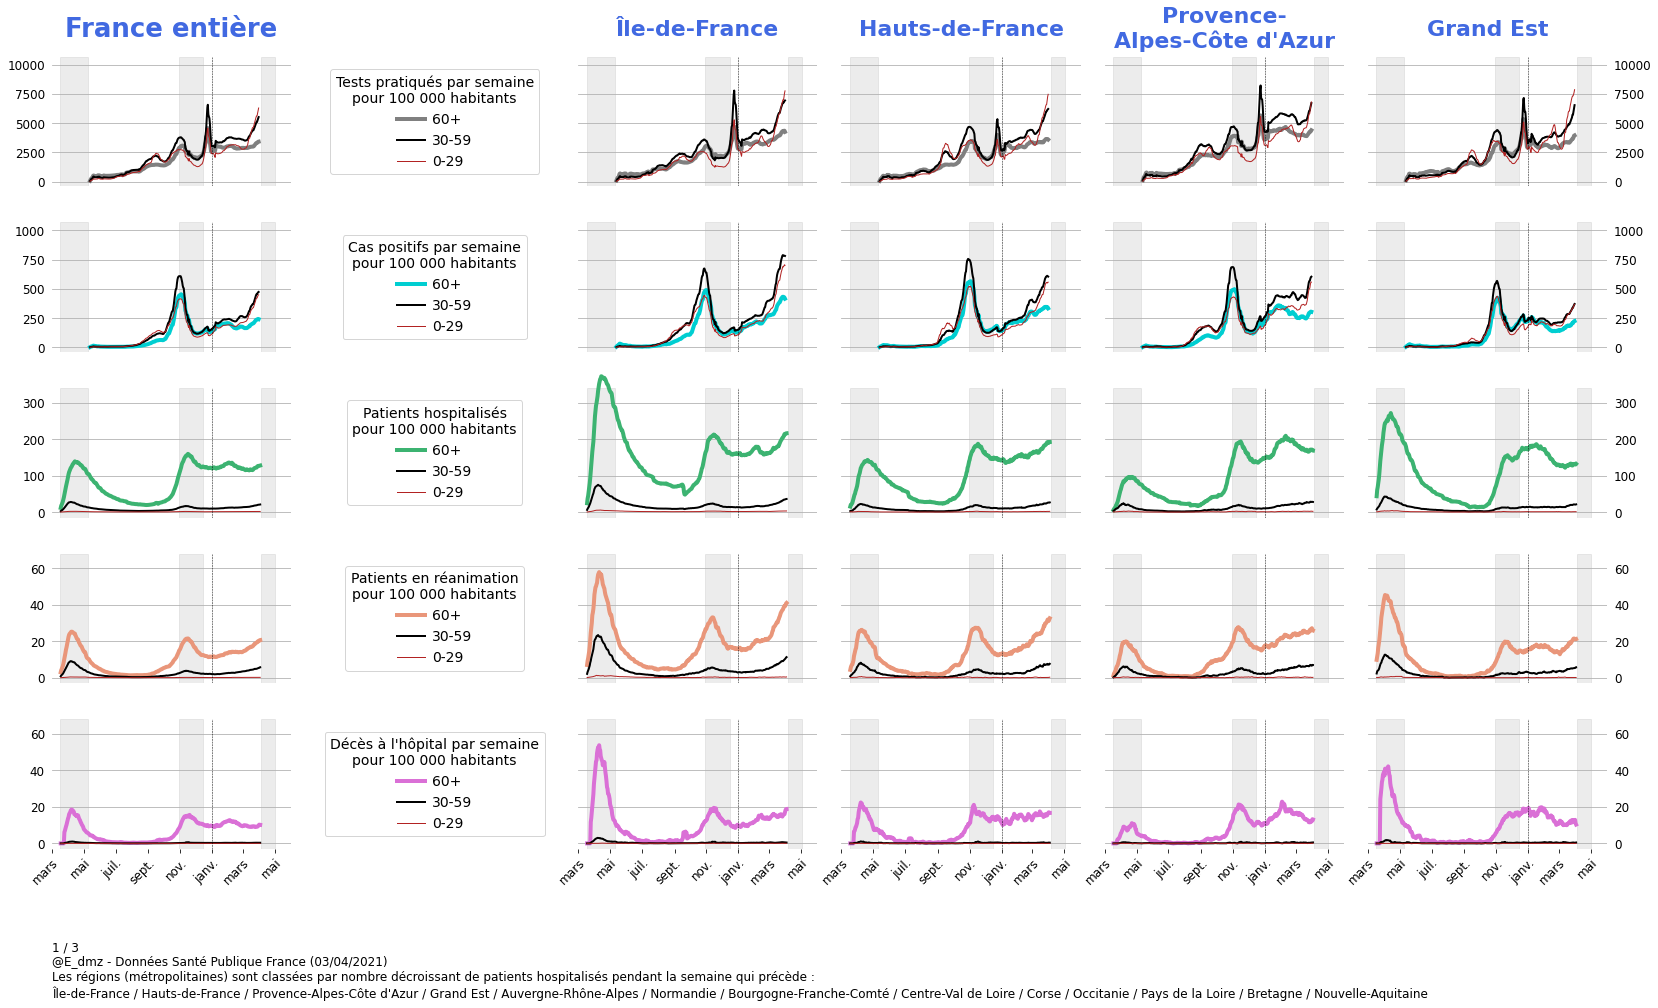

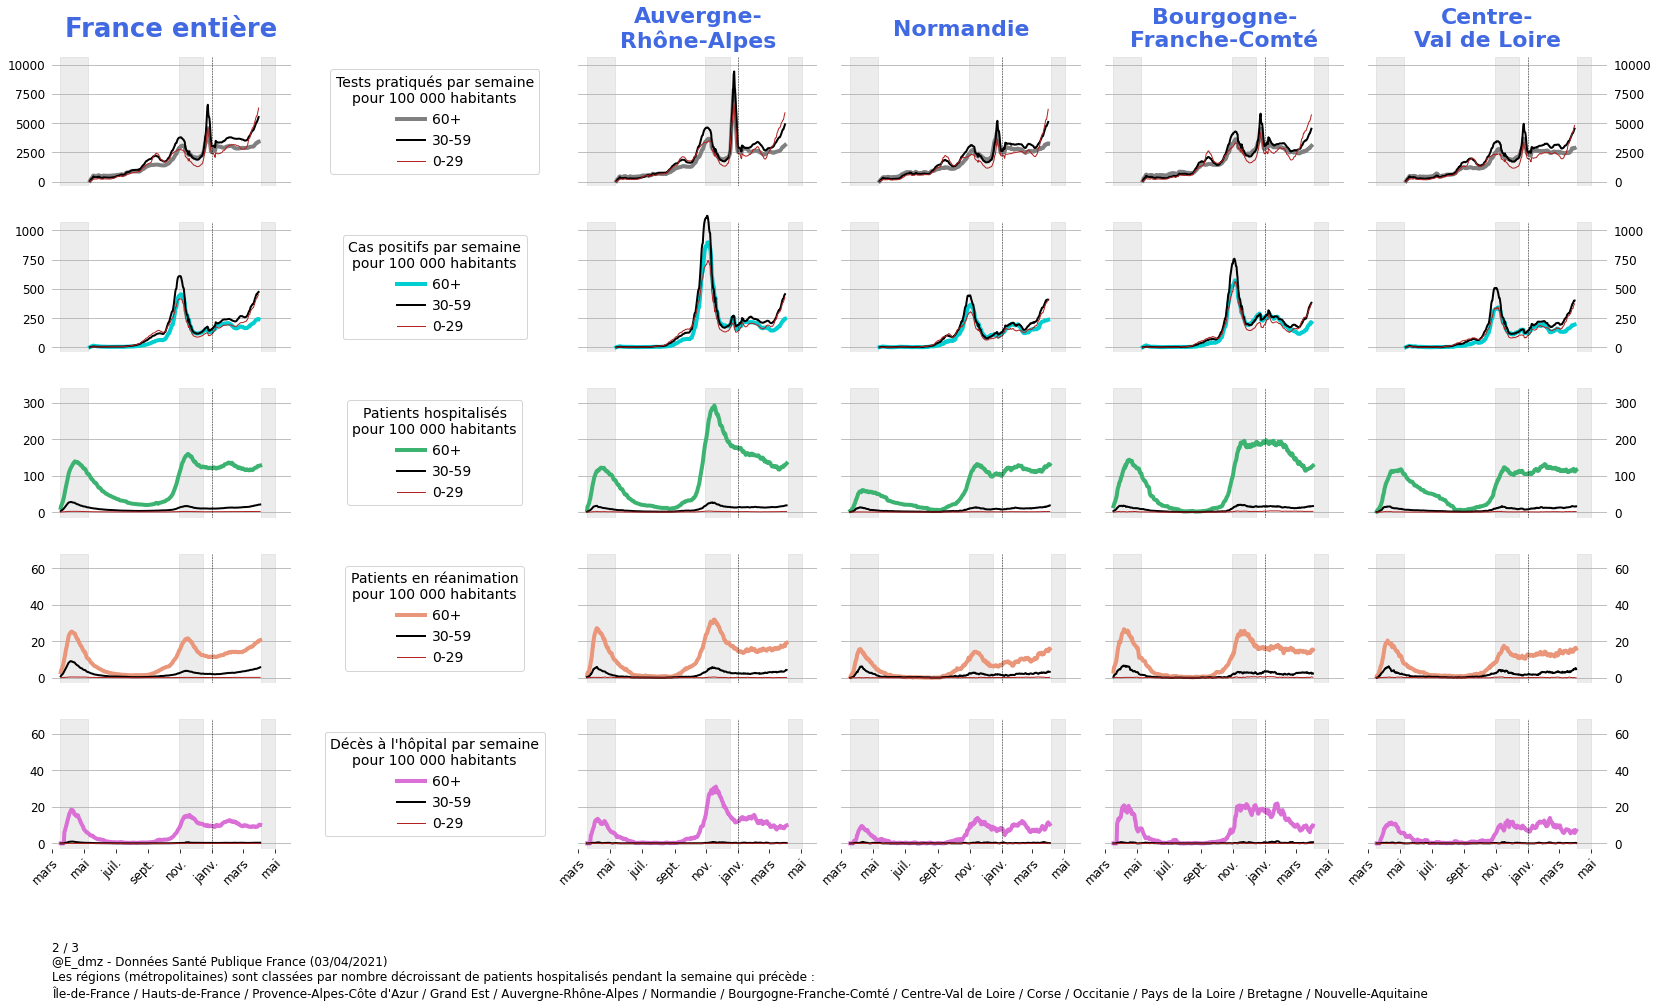

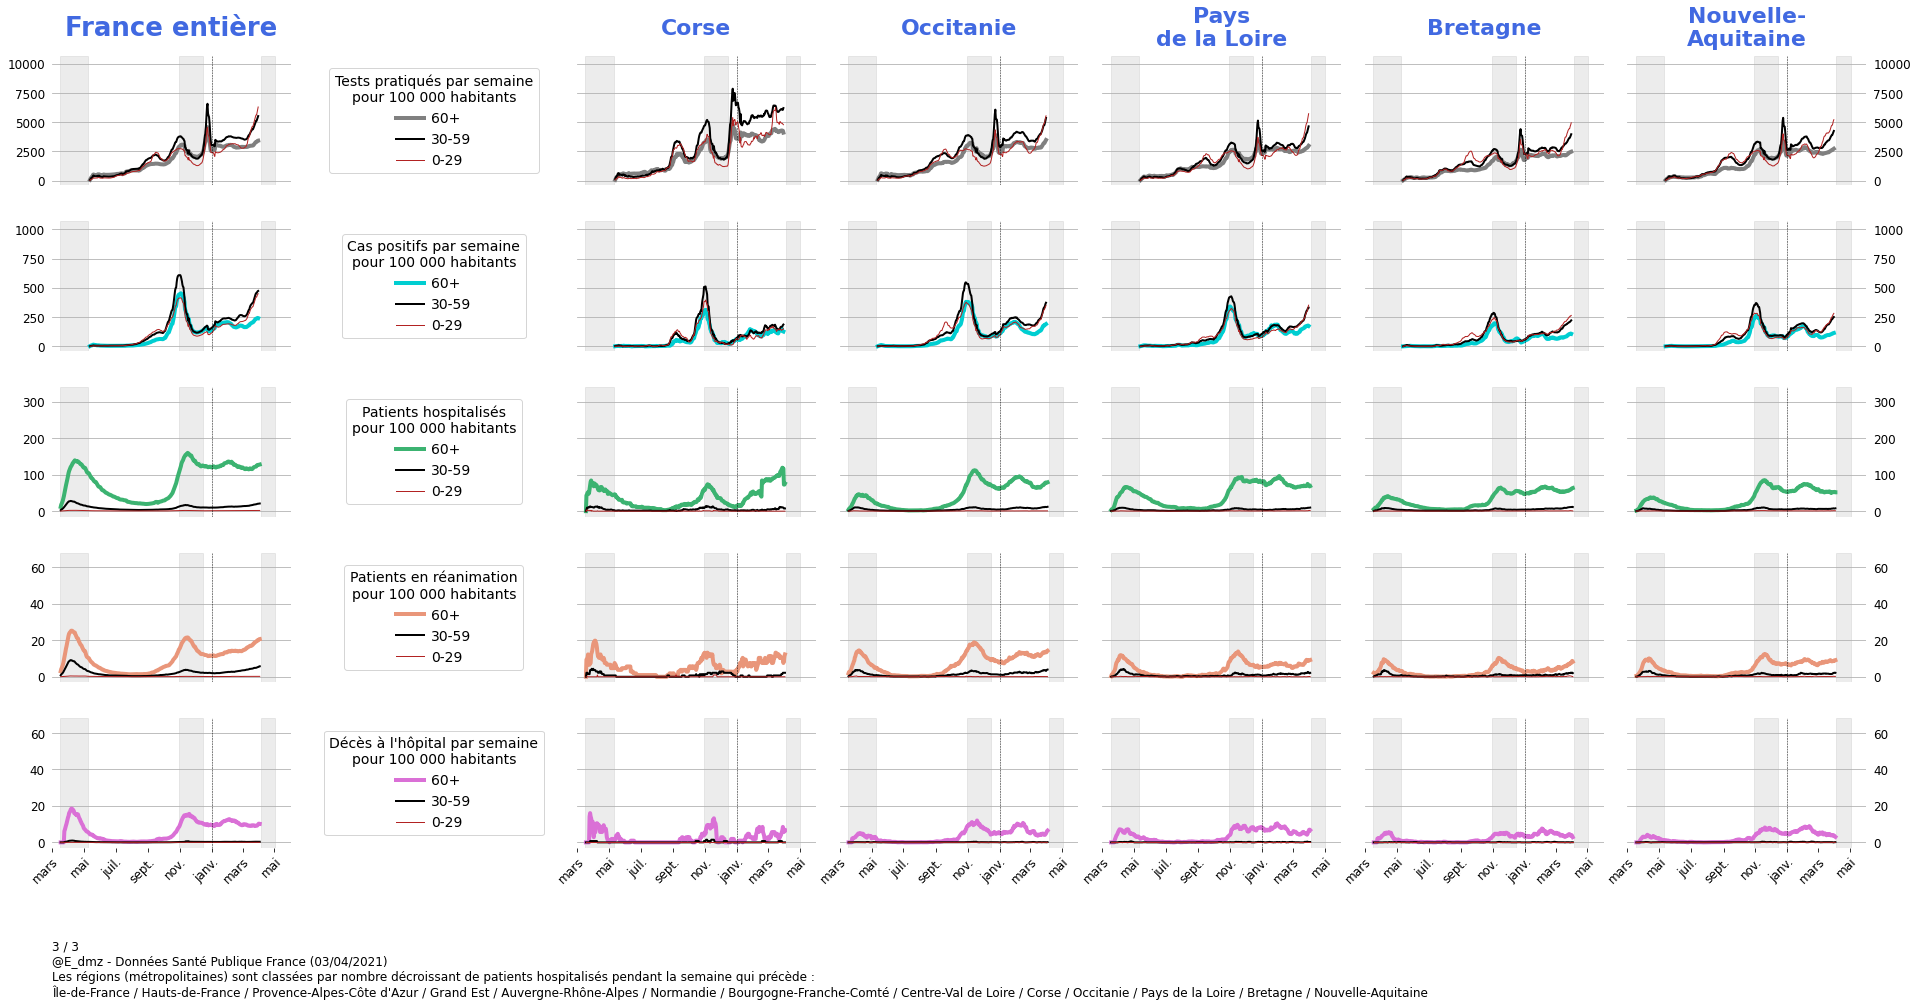

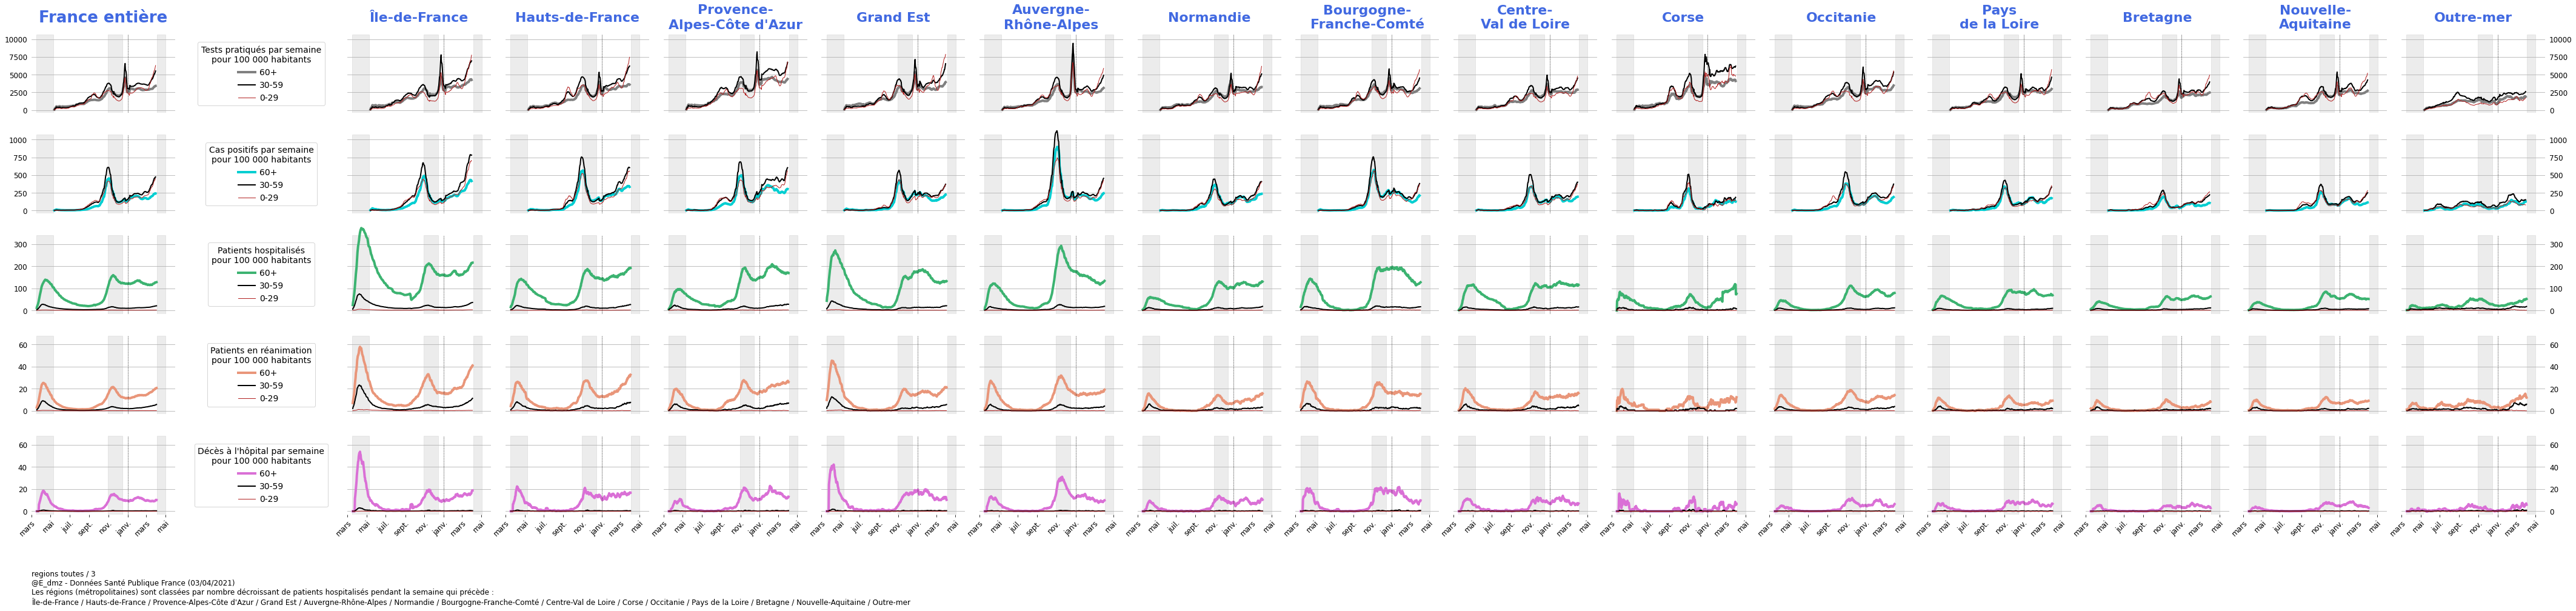

In [98]:
produce_fig_lines(d, regions_ordered[:4], regions_ordered[:-1], 1)
produce_fig_lines(d, regions_ordered[4:8], regions_ordered[:-1], 2)
produce_fig_lines(d, regions_ordered[8:-1], regions_ordered[:-1], 3)
produce_fig_lines(d, regions_ordered, regions_ordered, 'toutes')